# Credit Card Defaults - Data Exploration and Visualization

***
### MSDS 7331 Fall 2019 Lab Assignment- 1

The assignment  is for dataset selection and visualization. Details of of our data selection and visualizations are as follows.

**Team Members**

•	Pankaj Kumar

•	Ryan Goodwin

•	Deepti Kunupudi

**Data Source Reference**

https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset
Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

<div class="alert alert-block alert-info">
<b>Note</b> The following sections below follows the Rubric as per class standards. 
</div>

***
## Business Understanding

**"Default of credit card clients Data Set"** is from the UCI Machine Learning Repository. This data set contains records of 30,000 Taiwanese credit card clients between April 2005 and September 2005. 24 explanatory variables are given with these records describing factors such as monthly limit, sex, relationship status and amount owed.

The purpose of this data is to use these explanatory variables to determine if the client would default on their payment for the following month, which is the response variable we will be looking at with this dataset.

Bank cards are the most common credit card type.Predicting accurately which customers are most likely to default represents significant business opportunity for all banks. To measure the outcomes from this dataset we would build an algorithm to predict how likely a customer is to default on their payment. This algorithm would use as many attributes as necessary from the given data set to most accurately predict this outcome. A credit card company would like to be able to predict this outcome for multiple reasons. 
* One reason is to avoid customers who are not going to be able to pay on time. 
* Another would be to be prepared with legal and other resources if clients do default. 
Defaults on payments can take a toll on a bank's resources, therefore being able to predict customer behavior will allow the bank to be best prepared to avoid the situation overall or be ready to act if it were to occur.

In the case of our dataset, a good prediction algorithm would be able to predict with an accuracy rate of greater than 50%. Since we are predicting based on whether a customer would default or not. Since we have only 2 prediction values (1,0), the dataset is set as classification. Basic Machine learning models such as logistic regression, decision trees and more advanced techniques and models like artificial neural networks can be applied to have better prediction. Before we start modeling, we will perform exploratory data analysis, data visualization and dimension reduction techniques to identify the important features. We will later evaluate the results using 5-fold or 10-fold cross validation and find the better model based on accuracy, F1, recall,ROC, AUC and precision.


***
## Data Meaning Type

The link http://inseaddataanalytics.github.io/INSEADAnalytics/CourseSessions/ClassificationProcessCreditCardDefault.html provides a full detail of the data set. We have consolidated the information given into a table with a few more descripitive information below: 

**Data Exploration**

In [2]:
# Import all the libraries which are needed for exploratory data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# PCA Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [3]:
#Set max row display
pd.set_option('display.max_row',100)
#Set max column width to 50
pd.set_option('display.max_columns',50)

***
##  Data Quality

For checking data quality in the dataset, lets explore the data at each variable level to verify 
1. Missing values
2. Duplicates 
3. Outliers

*File Name*   : UCI_Credit_Card.csv

*File Format* : Comma Separated Values

The dataset has 30,000 records with 25 columns. 

In [5]:
#Read the data
ccdefault=pd.read_csv('./UCI_Credit_Card.csv')

ccdefault.shape

(30000, 25)

For more clarity, rename two columns. 
* The response variable "default.payment.next.month" does not fall into line with the other attributes so we will change the name to "DEFAULT" to align with the rest of the dataset. 

* The variable PAY_0 references the same months as PAY_AMT1 and BILL_AMT1 so we will rename it to "PAY_1" for further clarification moving forward.

In [6]:
ccdefault.rename(columns={'default.payment.next.month':'DEFAULT'},inplace=True)
ccdefault.rename(columns={'PAY_0':'PAY_1'},inplace=True)

The below results, provide more information on data types and its length on the 25 columns in the dataset.

In [7]:
ccdefault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
DEFAULT      30000 non-null int64
dtypes: float64

**1. Missing Values**

The dataset does not have any missing values. The chart below provides information about all the columns in the dataset and the metrics in terms of total and percent. Because there are no missing values we can proceed with the data we have without having to replace any rows. 

In [8]:
#Check for any nulls or missing values
total = ccdefault.isnull().sum().sort_values(ascending = False)
percent = (ccdefault.isnull().sum()/ccdefault.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,DEFAULT,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,PAY_AMT6,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***
**2. Duplicate Values**

For identifying the duplicates, we leveraged ID column in the dataset which represents customer identification, which is the unique way to identify the record in this dataset.

There are no duplicate records based on column name ID. The below snippet and output provides the evidence.

In [9]:
#Check for duplicates
duplicateRowsDF = ccdefault[ccdefault.duplicated(['ID'])]
print("Duplicate Rows based on a single column are:", duplicateRowsDF, sep='\n')

Duplicate Rows based on a single column are:
Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, DEFAULT]
Index: []


***
**3. Outliers**

As can be seen in the pairplots below, most categorical variables are coded to be represented as quantitative. Since there are not many options for variables such as sex, marriage and education we do not see any outliers. However when looking at the limit balance we see a clear outlier with one client recieving a substantially higher balance than the others. This value of 1,000,000 stands out and could potentially impact our predictions. We will not remove this variable as it is a credible data point. However we will remain cautious when predicting default rates for clients with a credit limit higher than 800,000.

The below box plot figues show each variables in the datasets and how the data is skewed and we can confirm the presense of outliers. Each plot below how the data is distributed.


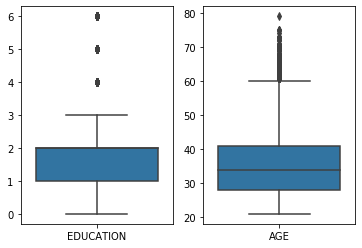

<Figure size 360x360 with 0 Axes>

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2)
plt.figure(figsize=(5,5))
sns.boxplot(data=ccdefault[["EDUCATION"]], ax=ax1)
sns.boxplot(data=ccdefault[["AGE"]], ax=ax2)
plt.show()

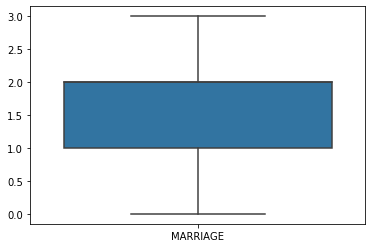

<Figure size 360x360 with 0 Axes>

In [36]:
fig, (ax1) = plt.subplots(1)
plt.figure(figsize=(5,5))
sns.boxplot(data=ccdefault[["MARRIAGE"]], ax=ax1)
plt.show()

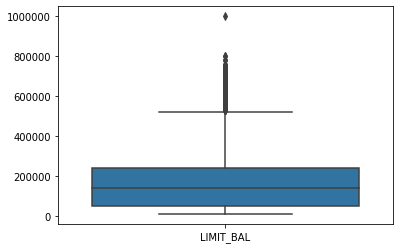

<Figure size 360x360 with 0 Axes>

In [37]:
fig, (ax1) = plt.subplots(1)
plt.figure(figsize=(5,5))
sns.boxplot(data=ccdefault[["LIMIT_BAL"]], ax=ax1)
plt.show()

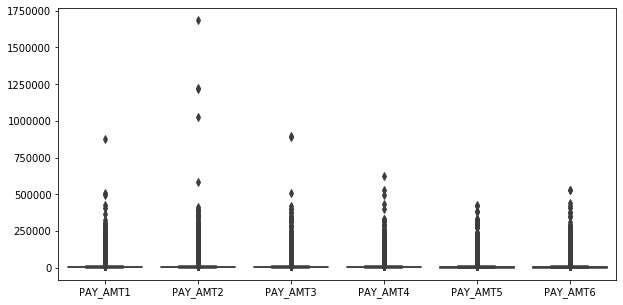

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(data=ccdefault[["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]])

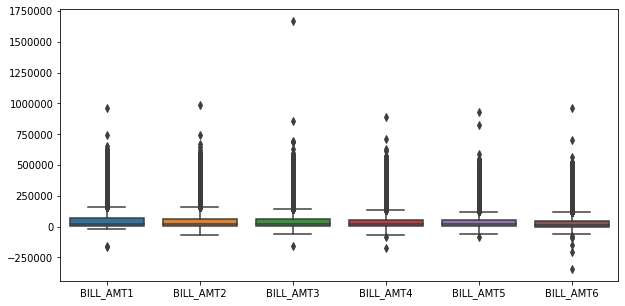

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(data=ccdefault[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]])

Based on the distribution, most of the customers pay 2 month upfront.

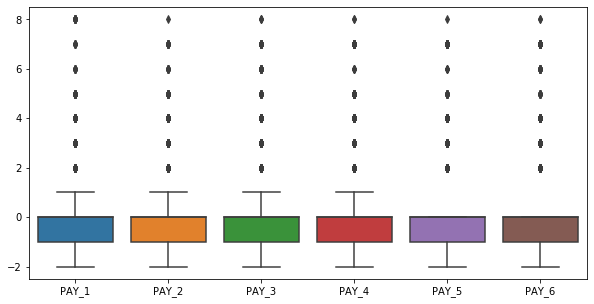

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(data=ccdefault[["PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]])

***

## Simple Statistics 

The below statistical information, represents information from each of the column in the dataset which provide us the information on mean, min, max and how the data is distributed. 

* From the available records, the credit users are in the age range from 21 to 79 years.
* The limit balance ranges from 10,000 to 1,000,000. 
* The target variable "DEFAULT" is a binary variable with values of 0 and 1, which leads us to the method of classification. 
* The mean of our target variable is 0.221. Because 1 represents a default payment we can make the inference that about 22% of clients defaulted on their latest payment.

In [16]:
#Statistical Information
ccdefault.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Leveraging pandas_profiling to profile the dataset and provide a profile report. The information below provides basic information with descriptive statistics and holistic picture of the dataset. We observe that

* PAY_AMT2 is highly skewed.
* Most of the credit card users are female (~55-60%).
* The age of the users are in the range of 21 to 79.
* The mean payment amount (PAY_AMT1) is around 5663.6 and maximum payment done is 873550. Similarly, we can see the similar metrics for other values (PAY_AMT2, PAY_AMT3,PAY_AMT4, PAY_AMT5, PAY_AMT6)
* 77% of the data are non-default and 23% are default data.
* Pearson and spearman correlation matrix provides how the variables are correlated with each other.
* It shows interesting relationship between pay amount for every month. It shows that age has no effect on default status.
* BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 are highly correlated with each other.


In [43]:
import pandas_profiling
pandas_profiling.ProfileReport(ccdefault)

C:\Users\dkunupudi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,25
Number of observations,30000
Total Missing (%),0.0%
Total size in memory,5.7 MiB
Average record size in memory,200.0 B
Numeric,18
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,5


***

## Visualize Attributes

The **voilin plots** shows how the data is for default and non-defaulters from each variable perspective. It is similar to boxplot but shows the kernal density on each side. The long tails in the data, show that we can look into more options to balance data and probably reduce the skew through transformations.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

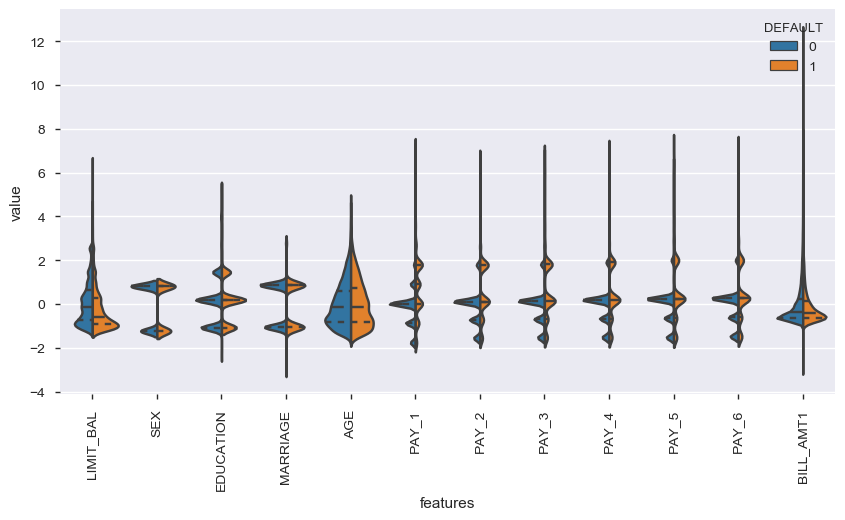

In [48]:
# y includes our labels and x includes our features; The code was leveraged from internet
y = ccdefault.DEFAULT
list = ['ID'] # ID is removed
x = ccdefault.drop(list,axis = 1 )
# Voilin plot - First 12 features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:12]],axis=1)
data = pd.melt(data,id_vars="DEFAULT",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,5))
sns.violinplot(x="features", y="value", hue="DEFAULT", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

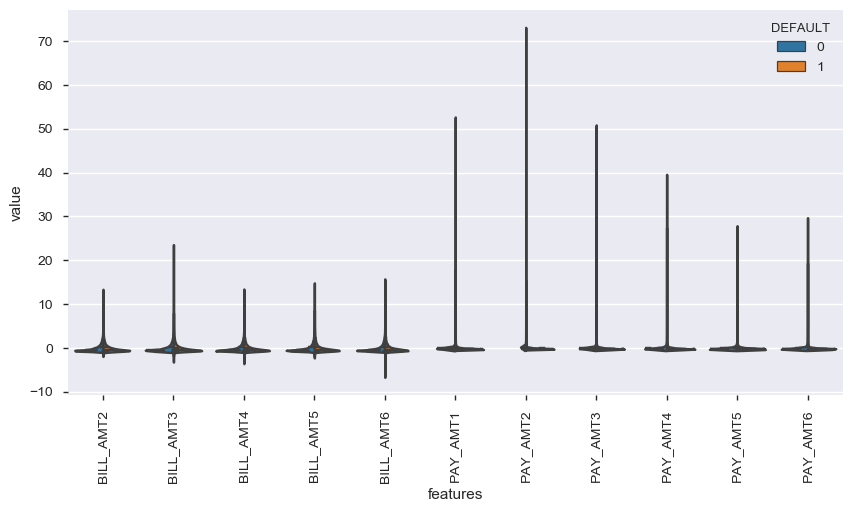

In [49]:
# Second 13 features
data = pd.concat([y,data_n_2.iloc[:,12:23]],axis=1)
data = pd.melt(data,id_vars="DEFAULT",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,5))
sns.violinplot(x="features", y="value", hue="DEFAULT", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

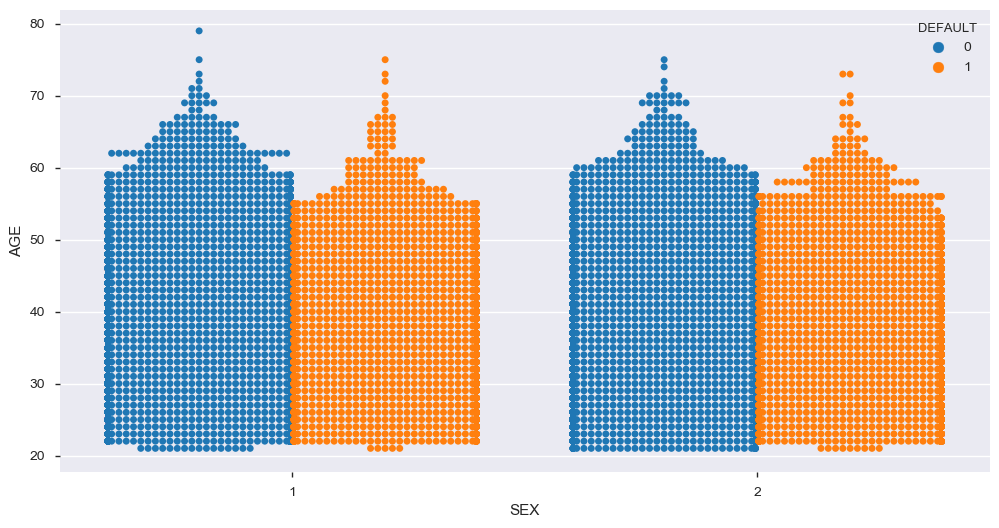

In [50]:
#SWARM PLOTS : For better visualization of distribution data
plt.figure(figsize=(12, 6))
sns.swarmplot(x="SEX", y="AGE", hue='DEFAULT', data=ccdefault,dodge=True)#, jitter=True);

In [ ]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x="MARRIAGE", y="AGE", hue='DEFAULT', data=ccdefault,dodge=True)#, jitter=True);

In [ ]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x="EDUCATION", y="AGE", hue='DEFAULT', data=ccdefault,dodge=True)#, jitter=True);

In [ ]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x="LIMIT_BAL", y="AGE", hue='DEFAULT', data=ccdefault,dodge=True)#, jitter=True);

In [ ]:
bins = [0,50000 , 100000, 250000, 350000,450000,1000000]
labels =[1,2,3,4,5,6]
ccdefault['binned'] = pd.cut(ccdefault['LIMIT_BAL'], bins,labels=labels)

In [ ]:
#greater than 50,000 limit balance
plt.figure(figsize=(18, 6))
sns.swarmplot(x="binned", y="AGE", hue='DEFAULT', data=ccdefault,dodge=True)#, jitter=True);

## Explore Joint Attributes

In [ ]:
sns.pairplot(data=ccdefault[["ID","LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","DEFAULT"]],
             hue="DEFAULT", dropna=True)

C:\Users\Ryan G\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ryan G\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ryan G\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Ryan G\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


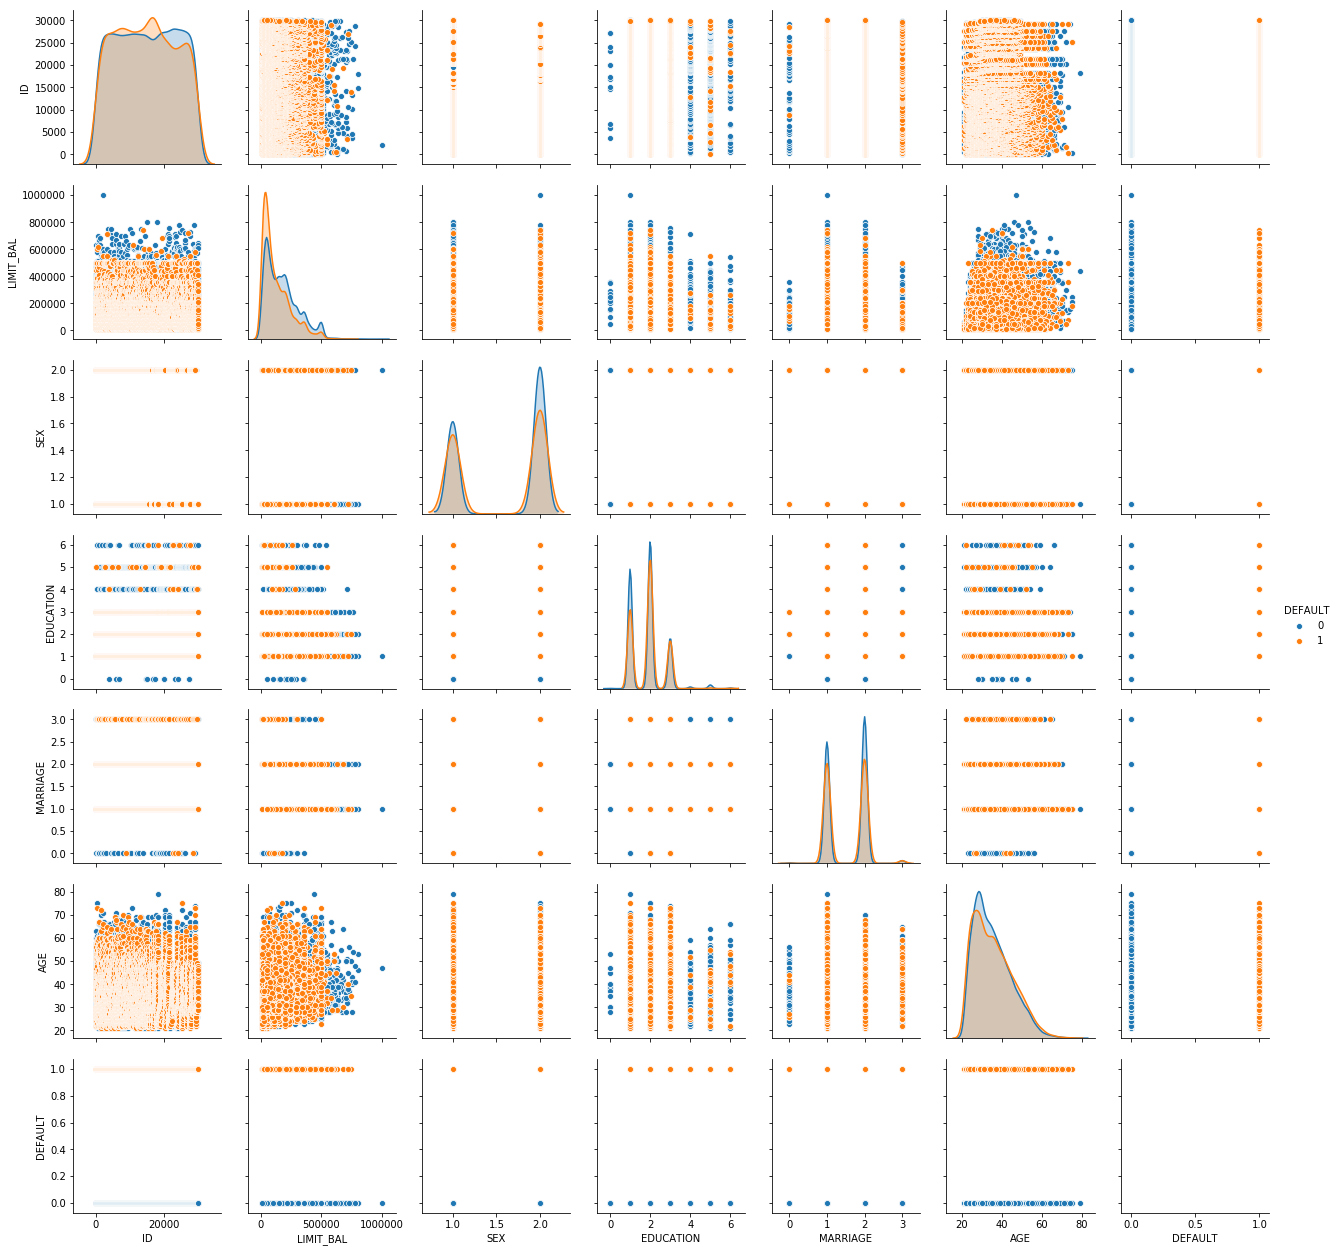

In [37]:
sns.pairplot(data=ccdefault[["ID","LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","DEFAULT"]],
             hue="DEFAULT", dropna=True)

C:\Users\Ryan G\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ryan G\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ryan G\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Ryan G\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


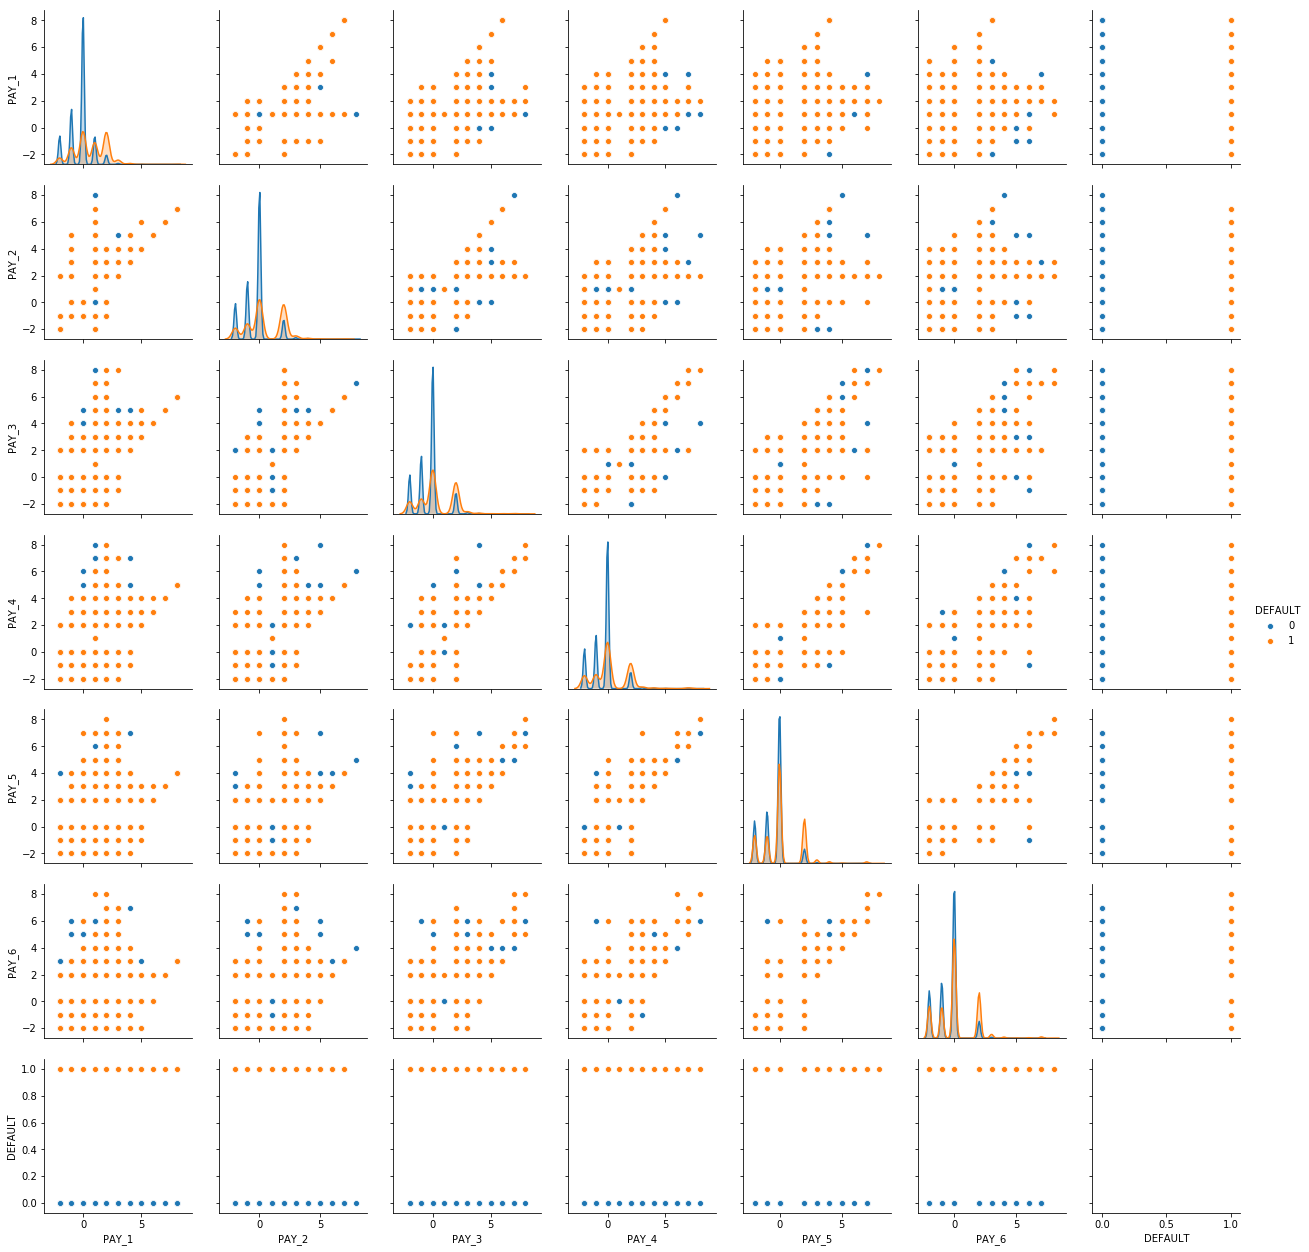

In [40]:
sns.pairplot(data=ccdefault[["PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","DEFAULT"]],
             hue="DEFAULT", dropna=True)

C:\Users\Ryan G\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ryan G\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ryan G\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Ryan G\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


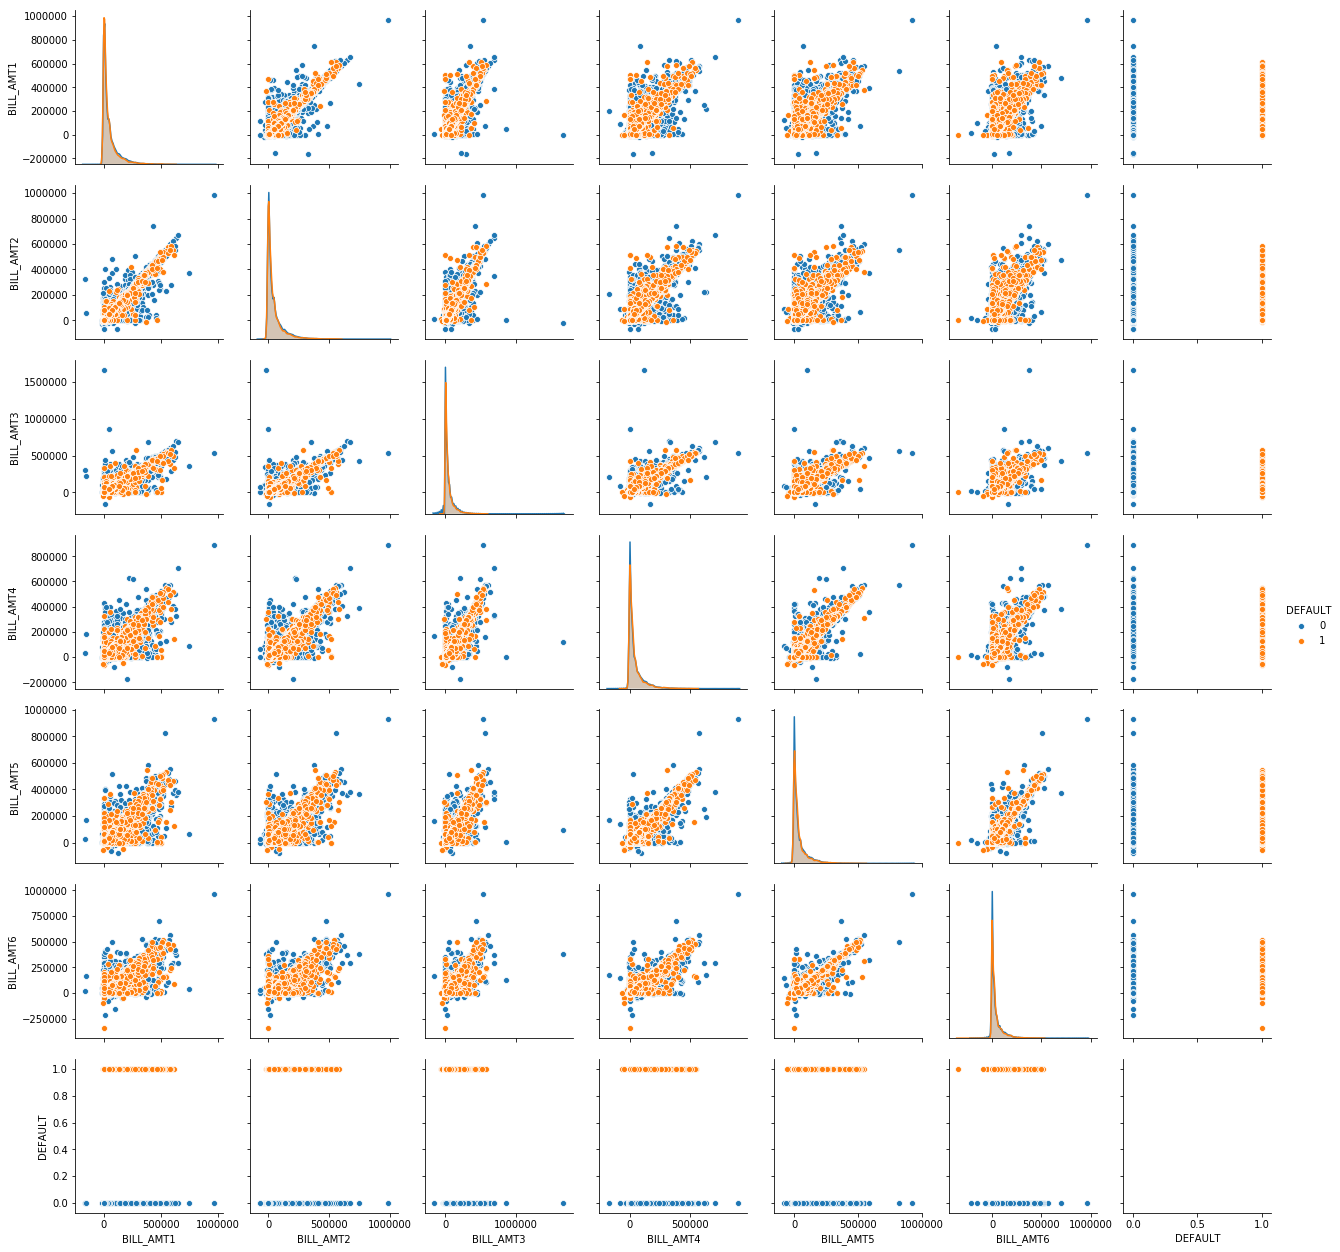

In [39]:
sns.pairplot(data=ccdefault[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","DEFAULT"]],
             hue="DEFAULT", dropna=True)

C:\Users\Ryan G\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ryan G\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ryan G\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Ryan G\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


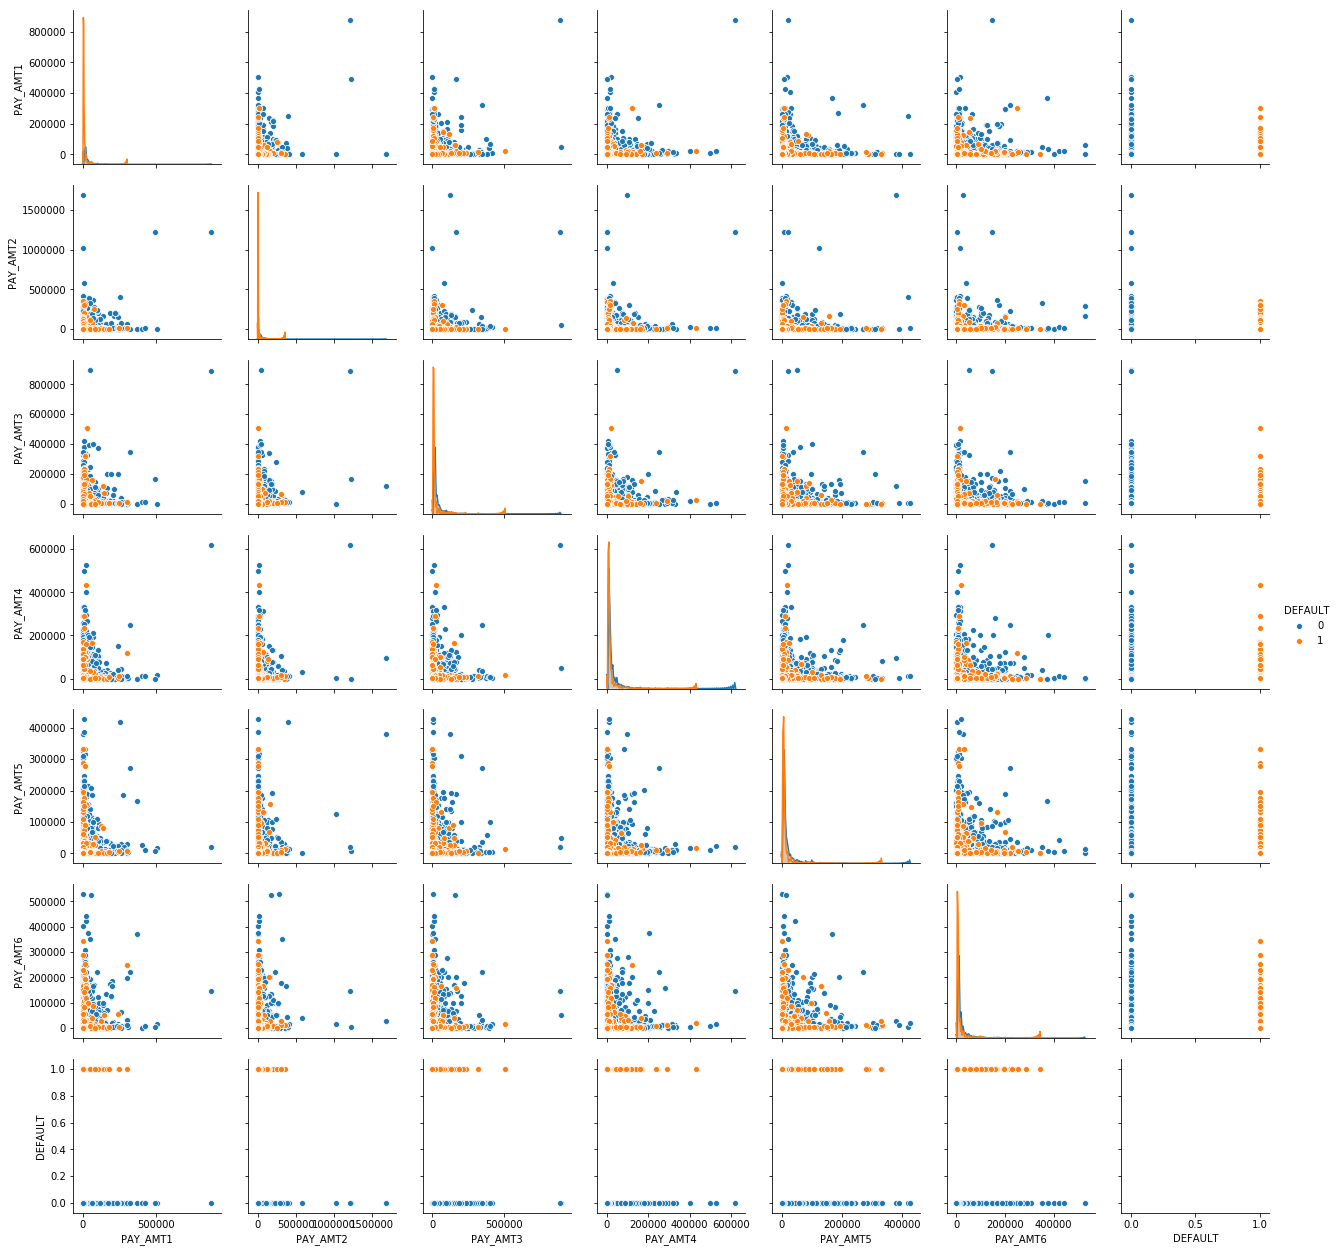

In [41]:
sns.pairplot(data=ccdefault[["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","DEFAULT"]],
             hue="DEFAULT", dropna=True)

In [ ]:
#Pairgrid - Pairplot is built on pairgrid
g = sns.PairGrid(data=ccdefault[["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

C:\Users\Ryan G\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


## Explore Attributes and Class

## New Features

While exploring the dataset we had the ability to see where new features could be added to better reach our prediction outcome. One idea for a new feature is a calculated column called "Percent_of_Bill_Paid." This variable would take PAY_AMT(X)/BILL_AMT(X) to give a percentage of the total bill for a given month that was paid off. From there we could track what percent of the bill the client is paying off monthly and see if this variable is correlated with the clients chances of defaulting on a payment.

Another feature that could be added is a binned column of LIM_BALANCE. Here we could break the monthly limit into bins and better interpret the monthly limits that might lead to default of payment. 

As we continue to work with this data set, more potential features will surely stand out to help us answer our modelling questions and guide us to a more accurate predictive model

## Exceptional Work	

As a part of this lab, we spent more than 20 hours understanding the dataset and spent time researching the different visualizations, these are represented in unique way like panda profiling, swarm plots and pair plots

* Swarm plots 
* Parallel Coordinates (Interactive Plot)
* Preliminary PCA Analysis
* Preliminary Logistic Regression 

#### Principle component Analysis (PCA)
PCA identifies the combination of components that account for the most variance of the data. The below initial analysis is done to identify these components. Before fitting our model, we need to standardize the numerical features and create dummies for all categorical features. In this case, we are checking with MinMaxScaler.

In [22]:
#PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(ccdefault.iloc[1:, 0:24])

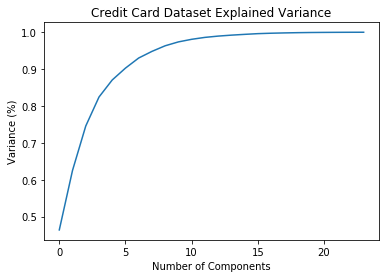

In [23]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Credit Card Dataset Explained Variance')
plt.show()

Based on initial analysis, the plot tells us that selecting 12 components we can preserve something around 98.8% or 99% of the total variance of the data. This is a primiliminary analysis.

#### Logistic Regression


In [24]:
#Set Variables
X = ccdefault.iloc[:,:-1].values
y = ccdefault.iloc[:,-1].values

# Split the dataset 70:30 between train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3,random_state = 1)


In [25]:
# Check the split
X_train.shape


(21000, 24)

In [26]:
X_test.shape

(9000, 24)

In [28]:
# Import the logistic regression tools from sklearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1,multi_class='ovr',solver='liblinear')
logreg.fit( X_train, y_train )


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
y_pred = logreg.predict( X_test )

References
https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70